In [1]:
#DATA CLEANING.................................................................................................

In [2]:
import pandas as pd

df = pd.read_table('BusData.txt',header=None)

In [3]:
df.head(10)

,0
0,Direction. U (from univer). H (from home)
1,"Day of week: Mon, Tue, Wed, Thu, Fri, Sat, Sun"
2,Departure time: hhmm
3,Time take: mmss
4,Arrival time: hhmm
5,# 16.04.2018
6,U. Mon 12h05 13m55
7,H. Tue 08h36 14m19
8,U. Tue 15h05 14m14
9,H. Wed 06h41 14m48


In [4]:
df.shape

(429, 1)

In [5]:
df2 = df.iloc[6:,:]

In [6]:
df2.head()

,0
6,U. Mon 12h05 13m55
7,H. Tue 08h36 14m19
8,U. Tue 15h05 14m14
9,H. Wed 06h41 14m48
10,U. Wed 10h12 13m04


In [7]:
df2.columns = ['all_data']

In [8]:
df2['True_row'] = df2['all_data'].apply(lambda x: True if x[:2] in ['U.','H.'] else False)

/home/ubuntu/anaconda3/envs/giangdip/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df2.head()

,all_data,True_row
6,U. Mon 12h05 13m55,True
7,H. Tue 08h36 14m19,True
8,U. Tue 15h05 14m14,True
9,H. Wed 06h41 14m48,True
10,U. Wed 10h12 13m04,True


In [10]:
df2.shape

(423, 2)

In [11]:
df2 = df2[df2['True_row'] == True]

In [12]:
df2.shape

(404, 2)

In [13]:
df2 = df2.drop_duplicates()

In [14]:
df2 = df2.drop(['True_row'],axis=1).reset_index(drop=True)

In [15]:
df2['num_of_data'] = df2['all_data'].apply(lambda x: len(x.split()))

In [16]:
df2['num_of_data'].value_counts()

5    287
4     62
3     39
Name: num_of_data, dtype: int64

In [17]:
df2['Direction'] = df2['all_data'].apply(lambda x: x.split()[0])
df2['Day_of_week'] = df2['all_data'].apply(lambda x: x.split()[1] if len(x.split()) >=2 else '-1')
df2['Departure'] = df2['all_data'].apply(lambda x: x.split()[2] if len(x.split()) >=3 else '-1')
df2['Time_take'] = df2['all_data'].apply(lambda x: x.split()[3] if len(x.split()) >=4 else '-1')
df2['Arrival'] = df2['all_data'].apply(lambda x: x.split()[4] if len(x.split()) >=5 else '-1')

In [18]:
df2 = df2.reset_index(drop=True)

In [19]:
df2.head()

,all_data,num_of_data,Direction,Day_of_week,Departure,Time_take,Arrival
0,U. Mon 12h05 13m55,4,U.,Mon,12h05,13m55,-1
1,H. Tue 08h36 14m19,4,H.,Tue,08h36,14m19,-1
2,U. Tue 15h05 14m14,4,U.,Tue,15h05,14m14,-1
3,H. Wed 06h41 14m48,4,H.,Wed,06h41,14m48,-1
4,U. Wed 10h12 13m04,4,U.,Wed,10h12,13m04,-1


In [20]:
df2['Departure_hh'] = df2['Departure'].apply(lambda x: int(x[:2]) if len(x) >4 else -1) 

In [21]:
df2['Departure_mm'] = df2['Departure'].apply(lambda x: int(x[3:5]) if len(x) >4 else -1)

In [22]:
df2['Time_take_mm'] = df2['Time_take'].apply(lambda x: int(x[:2]) if len(x) >4 else -1)

In [23]:
df2['Time_take_ss'] = df2['Time_take'].apply(lambda x: int(x[3:5]) if len(x) >4 else -1)

In [24]:
df2['Arrival_hh'] = df2['Arrival'].apply(lambda x: int(x[:2]) if len(x) >4 else -1)

In [25]:
df2['Arrival_mm'] = df2['Arrival'].apply(lambda x: int(x[3:5]) if len(x) >4 else -1)

In [26]:
df2.head()

,all_data,num_of_data,Direction,Day_of_week,Departure,Time_take,Arrival,Departure_hh,Departure_mm,Time_take_mm,Time_take_ss,Arrival_hh,Arrival_mm
0,U. Mon 12h05 13m55,4,U.,Mon,12h05,13m55,-1,12,5,13,55,-1,-1
1,H. Tue 08h36 14m19,4,H.,Tue,08h36,14m19,-1,8,36,14,19,-1,-1
2,U. Tue 15h05 14m14,4,U.,Tue,15h05,14m14,-1,15,5,14,14,-1,-1
3,H. Wed 06h41 14m48,4,H.,Wed,06h41,14m48,-1,6,41,14,48,-1,-1
4,U. Wed 10h12 13m04,4,U.,Wed,10h12,13m04,-1,10,12,13,4,-1,-1


In [27]:
df2 = df2.drop(['all_data','num_of_data','Departure','Time_take','Arrival'],axis=1)

In [28]:
df2.shape

(388, 8)

In [29]:
df2.head()

,Direction,Day_of_week,Departure_hh,Departure_mm,Time_take_mm,Time_take_ss,Arrival_hh,Arrival_mm
0,U.,Mon,12,5,13,55,-1,-1
1,H.,Tue,8,36,14,19,-1,-1
2,U.,Tue,15,5,14,14,-1,-1
3,H.,Wed,6,41,14,48,-1,-1
4,U.,Wed,10,12,13,4,-1,-1


In [30]:
# BASIC PROCESSING...................................................................................

In [31]:
#calculate time_take by ss

time_take_cal_mm = [] 
for idx in range(df2.shape[0]):
    if df2.iloc[idx,2] != -1 and df2.iloc[idx,6] != -1 :
        time_take = - df2.iloc[idx,2] * 60 - df2.iloc[idx,3] + df2.iloc[idx,6] * 60 + df2.iloc[idx,7]
        time_take_cal_mm.append(time_take)
    elif df2.iloc[idx,4] != -1:
        time_take_cal_mm.append(df2.iloc[idx,4]  + df2.iloc[idx,5] * 1.0 / 60)
    else:
        time_take_cal_mm.append(-1)

In [32]:
print(len(time_take_cal_mm))

388


In [33]:
df2['Time_take_cal_mm'] = time_take_cal_mm

In [34]:
df2['Direction'] = df2['Direction'].apply(lambda x: x[0])

In [35]:
df2['Day_of_week'] = df2['Day_of_week'].apply(lambda x: x[:-1])

In [36]:
df2['Day_of_week'].value_counts()

Thu    61
Fri    59
Wed    49
Tue    48
Mon    46
Th     21
We     20
Fr     18
Sat    18
Mo     18
Tu     17
Sun     7
Sa      3
Su      3
Name: Day_of_week, dtype: int64

In [37]:
#mapping date
map_date = {'Th':'Thu','We':'Wed','Fr':'Fri','Mo':'Mon','Tu':'Tue','Sa':'Sat','Su':'Sun'}

df2['Day_of_week'] = df2['Day_of_week'].apply(lambda x: map_date[x] if len(x) < 3 else x)

In [38]:
df2.head()

,Direction,Day_of_week,Departure_hh,Departure_mm,Time_take_mm,Time_take_ss,Arrival_hh,Arrival_mm,Time_take_cal_mm
0,U,Mon,12,5,13,55,-1,-1,13.916667
1,H,Tue,8,36,14,19,-1,-1,14.316667
2,U,Tue,15,5,14,14,-1,-1,14.233333
3,H,Wed,6,41,14,48,-1,-1,14.800000
4,U,Wed,10,12,13,4,-1,-1,13.066667


In [39]:
df_TimeTake =  df2[df2['Time_take_cal_mm'] > -1]

In [40]:
df_TimeTake.shape

(222, 9)

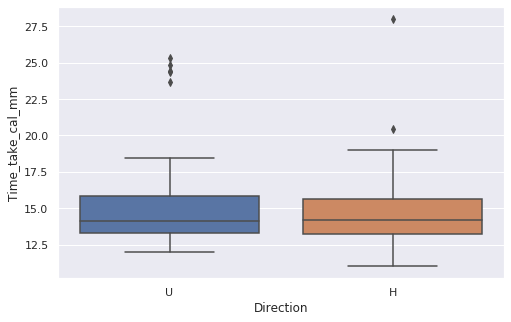

In [41]:
import seaborn as sns

#plot time take by direction
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x="Direction", y="Time_take_cal_mm", data=df_TimeTake)

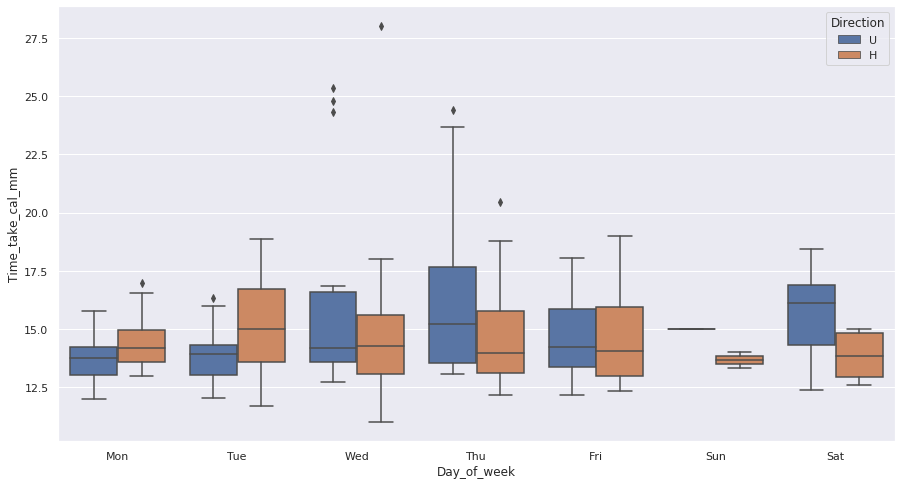

In [42]:
#plot time take by direction & day
sns.set(rc={'figure.figsize':(15,8)})
ax = sns.boxplot(x="Day_of_week", y="Time_take_cal_mm",hue="Direction" , data=df_TimeTake)

In [43]:
import numpy as np
#time average from home to university
avg_H2U = np.average(df_TimeTake[df_TimeTake['Direction']=='H']['Time_take_cal_mm'])
print('Avereage time to University: {:.3f} m'.format(avg_H2U))

Avereage time to University: 14.699 m


In [44]:
#check number of row do not have departure time
sum(df_TimeTake['Departure_hh'] == -1)

0

In [45]:
#time array by day
df_TimeTake['Arrival_cal'] =  df_TimeTake['Departure_hh'] + df_TimeTake['Departure_mm'] * 1.0 / 60 + df_TimeTake['Time_take_cal_mm'] * 1.0/ 60

/home/ubuntu/anaconda3/envs/giangdip/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


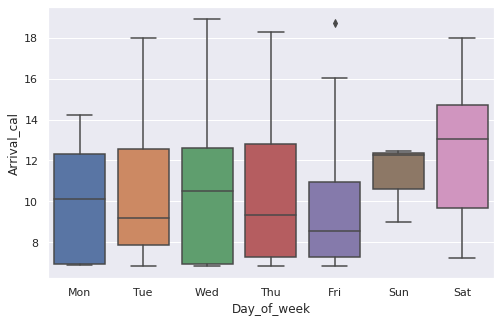

In [46]:
#plot arraival time by date for all data
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x="Day_of_week", y="Arrival_cal", data=df_TimeTake)

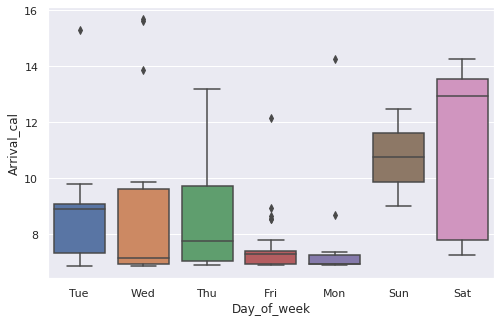

In [47]:
#plot arraival time by date for data from home
sns.set(rc={'figure.figsize':(8,5)})
ax = sns.boxplot(x="Day_of_week", y="Arrival_cal", data=df_TimeTake[df_TimeTake['Direction']=='H'])
##Student often be late on Tuseday and Thurseday

In [48]:
#count by direction
df_TimeTake['Direction'].value_counts()

H    131
U     91
Name: Direction, dtype: int64

In [49]:
df_TimeTake['Day_of_week'].value_counts()

Wed    44
Fri    42
Thu    42
Tue    41
Mon    38
Sat    12
Sun     3
Name: Day_of_week, dtype: int64

In [50]:
#ASSUMPTION PROPOSING.............................................................................................

In [51]:
"""
1) Time from Home to Univery is higher than time from Univery to Home
2) Student arrival time soonest is Friday
3) Less Student go to Univery in Monday
4) Thurseday take longest time

"""
pass

In [52]:
#BUS DATA ANALYSIS

In [53]:
"""
(a) Yes, in the case accident happens or GOV ban some roads for specific event
(b) No Data
(c) No Data
(d) No Data
(e) No Dataa
"""
pass